In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold, cross_val_score
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
Quality_Prediction=pd.read_csv("QualityPrediction.csv")
Quality_Prediction

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
Quality_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
Quality_Prediction.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Heat Map to Check Multicollinearity

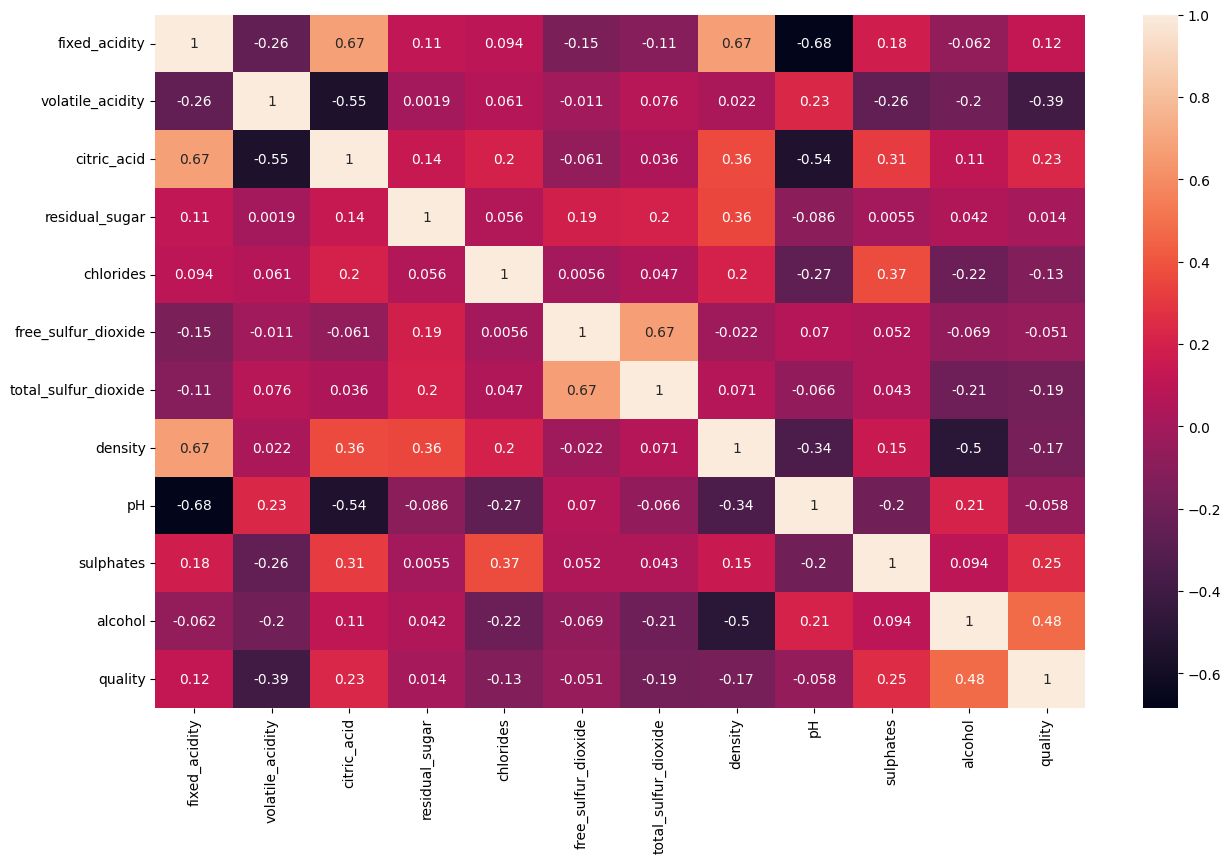

In [5]:
plt.figure(figsize=(15,9))
sns.heatmap(Quality_Prediction.corr(),annot=True)
plt.show()

# Spliting Data into Train and Test

In [6]:
x=Quality_Prediction.drop('quality', axis=1).values
y=Quality_Prediction['quality'].apply(lambda change_value: 1 if change_value>=7 else 0)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=50)

In [8]:
Random_Forest=RandomForestClassifier(random_state=40)

# Hyperparameters Tuning

In [9]:
np.random.seed(40)
param_dist = {'max_depth':[2,3,4,5],'bootstrap':[True,False],'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2',None]}
Crossval_RF=GridSearchCV(Random_Forest,cv=10,param_grid=param_dist,n_jobs=2)
Crossval_RF.fit(x_train,y_train)
print('Best Parameters using Grid search:===>',Crossval_RF.best_params_)

Best Parameters using Grid search:===> {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': None}


# Random Forest Model Building

In [10]:
Random_Forest.set_params(criterion='entropy',max_features = 'auto',max_depth = 6,bootstrap=False)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       random_state=40)

In [11]:
Random_Forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=6,
                       random_state=40)

In [18]:
RF_Train_Score=Random_Forest.score(x_train,y_train)
RF_Test_Score=Random_Forest.score(x_test,y_test)
print("Training Score===>",RF_Train_Score)
print("Testing Score===>",RF_Test_Score)

Training Score===> 0.9382329945269742
Testing Score===> 0.9375


In [19]:
y_predict=Random_Forest.predict(x_test)
Y_TEST=y_test.values.ravel()

In [20]:
print("Precdicted Values:===>\n",y_predict)
print()
print()
print("Tested Values:==>\n",Y_TEST)

Precdicted Values:===>
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0]


Tested Values:==>
 [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 

# Confusion Matrix 

In [21]:
conf_matrix = confusion_matrix(Y_TEST,y_predict)
conf_matrix

array([[285,   2],
       [ 18,  15]], dtype=int64)

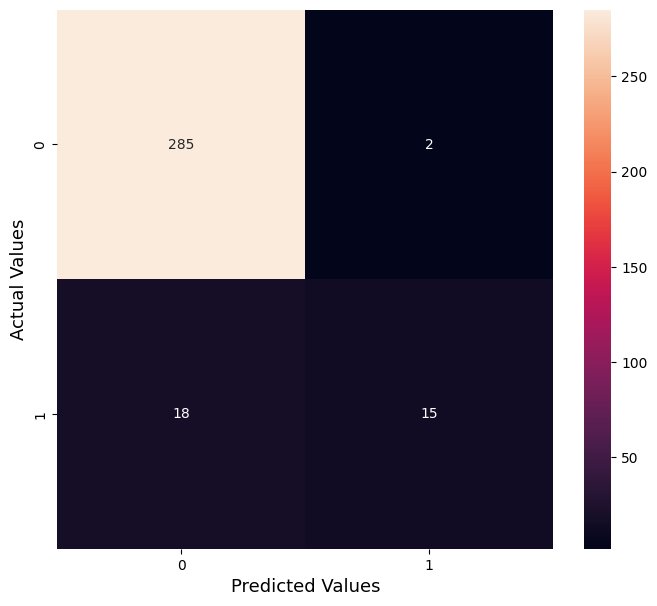

In [22]:
plt.figure(figsize=(8,7))
sns.heatmap(conf_matrix, annot = True,fmt='d')
plt.ylabel("Actual Values",fontsize=13)
plt.xlabel("Predicted Values",fontsize=13)
plt.show()

# Accuracy Precision and Recall

In [23]:
from sklearn.metrics import precision_score,recall_score
print("Accuracy of the Confusion Matrix===>>",accuracy_score(Y_TEST,y_predict))
print("\nPrecision Score of Confusion Matrix",precision_score(Y_TEST,y_predict))
print("\nRecall Score of Confusion Matrix",recall_score(Y_TEST,y_predict))

Accuracy of the Confusion Matrix===>> 0.9375

Precision Score of Confusion Matrix 0.8823529411764706

Recall Score of Confusion Matrix 0.45454545454545453


# ROC and AUC

In [24]:
Y_Predict_Prob=Random_Forest.predict_proba(x_test)[:,1]

In [25]:
fpr_RF,tpr_RF,_=roc_curve(y_test,Y_Predict_Prob)

In [26]:
roc_auc_RF=auc(fpr_RF,tpr_RF)

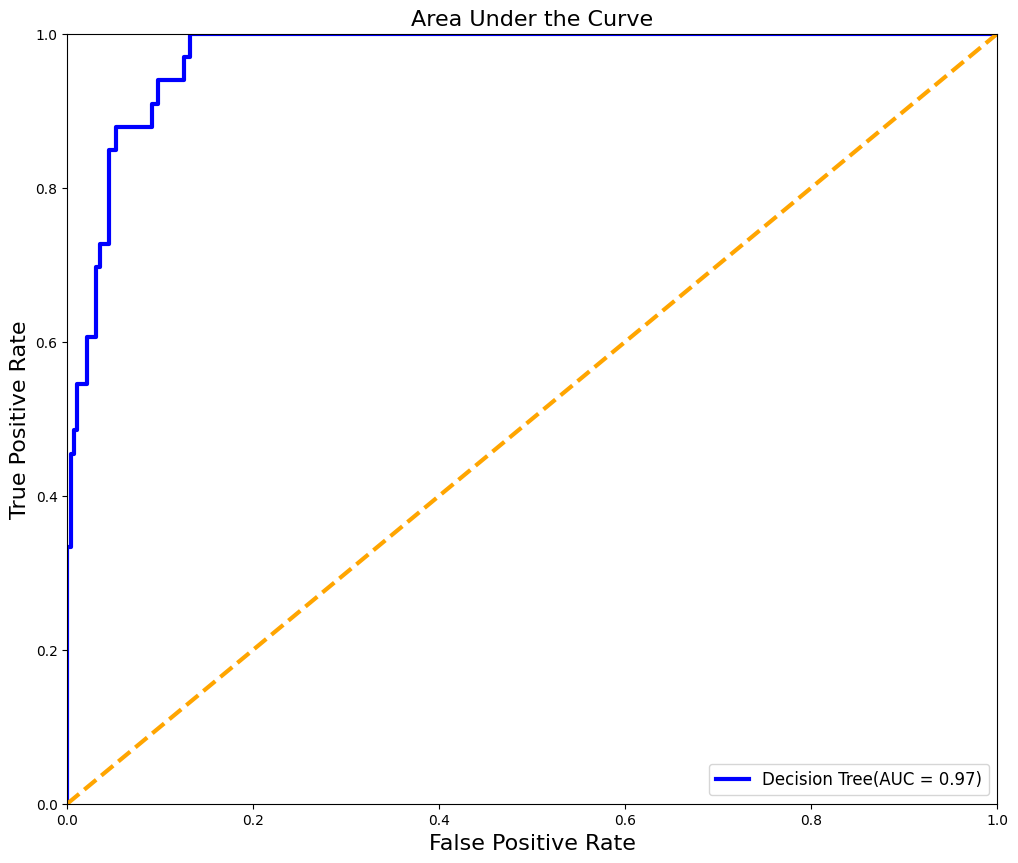

In [27]:
plt.figure(figsize=(12,10))

plt.plot(fpr_RF,tpr_RF,color='blue',lw=3,label='Decision Tree(AUC = %0.2f)'%roc_auc_RF)
plt.plot([0,1],[0,1],color='orange',lw=3,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("Area Under the Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=12)
plt.show()